In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
import pandas as pd
import numpy as np
from nltk.probability import FreqDist

from matplotlib import pyplot as plt
import seaborn as sns

import math

# Load file

In [4]:
data = pd.read_csv('/content/drive/MyDrive/summer_project_2021/airbnb/listings.csv')

In [5]:
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9835,Beautiful Room & House,33057,Manju,NaN,Manningham,-37.77247,145.09232,Private room,60,1,4,2015-09-12,0.03,1,365
1,10803,Room in Cool Deco Apartment in Brunswick East,38901,Lindsay,NaN,Moreland,-37.76606,144.97951,Private room,28,4,145,2019-12-17,2.26,1,278
2,12936,St Kilda 1BR+BEACHSIDE+BALCONY+WIFI+AC,50121,The A2C Team,NaN,Port Phillip,-37.85999,144.97662,Entire home/apt,95,3,42,2016-01-25,0.76,10,0
3,33111,Million Dollar Views Over Melbourne,143550,Paul,NaN,Melbourne,-37.82163,144.96672,Private room,1000,1,2,2012-01-27,0.02,1,365
4,38271,Melbourne - Old Trafford Apartment,164193,Daryl & Dee,NaN,Casey,-38.05725,145.33936,Entire home/apt,101,1,161,2020-01-09,1.25,1,329


In [7]:
data.shape
# 18605, 16

(18605, 16)

In [8]:
# 1
len(set(data.id))
# id is not useful in this case, it is just unique number for each variable

18605

In [10]:
# 2
len(set(data.name))
# useless

18028

In [11]:
# 3
len(set(data.host_id))
# useless

11983

In [12]:
# 4
len(set(data.host_name))
# useless

5013

In [17]:
# 5
# len(set(data.neighbourhood_group))
# set(data.neighbourhood_group)
# useless attribute

In [14]:
# 6
len(set(data.neighbourhood))

30

In [18]:
# 7&8
# len(set(data.latitude))
# len(set(data.longitude))
# not interested in

11449

In [19]:
# 9
len(set(data.room_type))

4

In [20]:
# 10
len(set(data.price))

725

In [21]:
# 11
len(set(data.minimum_nights))

80

In [22]:
# 12
len(set(data.number_of_reviews))

364

In [23]:
# 13
len(set(data.last_review))
# need to split this column to year and month

2011

In [24]:
# 14
len(set(data.reviews_per_month))

4973

In [25]:
# 15
len(set(data.calculated_host_listings_count))

51

In [26]:
# 16
len(set(data.availability_365))

366

In [27]:
# col_names = []
# for col in data.columns:
#     col_names += [col]
# col_names

# preprocessing

## last_review split to year_review and month_review

In [55]:
data.last_review

0        2015-09-12
1        2019-12-17
2        2016-01-25
3        2012-01-27
4        2020-01-09
            ...    
18600           NaN
18601           NaN
18602           NaN
18603           NaN
18604           NaN
Name: last_review, Length: 18605, dtype: object

In [106]:
new_data = data[['neighbourhood', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'last_review', 'availability_365']]
# new_data.head()

In [61]:
# new_data.head(20)

In [107]:
# year
new_data['year_review'] = new_data.last_review
new_data.year_review = new_data.year_review.fillna('0')
for i in range(len(data)):
  new_data['year_review'][i] = int(new_data.year_review[i].split('-')[0])
# for i in range(len(data)):
#   new_data['year_review'][i] = new_data.last_review[i].split('-')[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [88]:
set(new_data.year_review)

{0, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}

In [108]:
# month
new_data['month_review'] = new_data.last_review
new_data.month_review = new_data.month_review.fillna('0000-0')

for i in range(len(data)):
  new_data['month_review'][i] = int(new_data.month_review[i].split('-')[1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [90]:
set(new_data.month_review)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}

In [78]:
new_data[['last_review','year_review','month_review']]
# new_data.head()

,last_review,year_review,month_review
0,2015-09-12,2015,09
1,2019-12-17,2019,12
2,2016-01-25,2016,01
3,2012-01-27,2012,01
4,2020-01-09,2020,01
...,...,...,...
18600,NaN,0,0
18601,NaN,0,0
18602,NaN,0,0
18603,NaN,0,0


# user case

## Price
1. is there any relationship between the neighbourhood and price?

2. is there any relationship between the room_type and price?

3. is there any relationship between the minimum_nights and price?

4. will be price of the room changed in different years? (relationship between last_review and price)

5. will the availability affect the price?

### 1. is there any relationship between the neighbourhood and price?

In [35]:
new_data.price

0          60
1          28
2          95
3        1000
4         101
         ... 
18600     100
18601      70
18602     182
18603     115
18604     116
Name: price, Length: 18605, dtype: int64

In [36]:
new_data.neighbourhood

0          Manningham
1            Moreland
2        Port Phillip
3           Melbourne
4               Casey
             ...     
18600       Melbourne
18601      Manningham
18602          Monash
18603       Melbourne
18604       Melbourne
Name: neighbourhood, Length: 18605, dtype: object

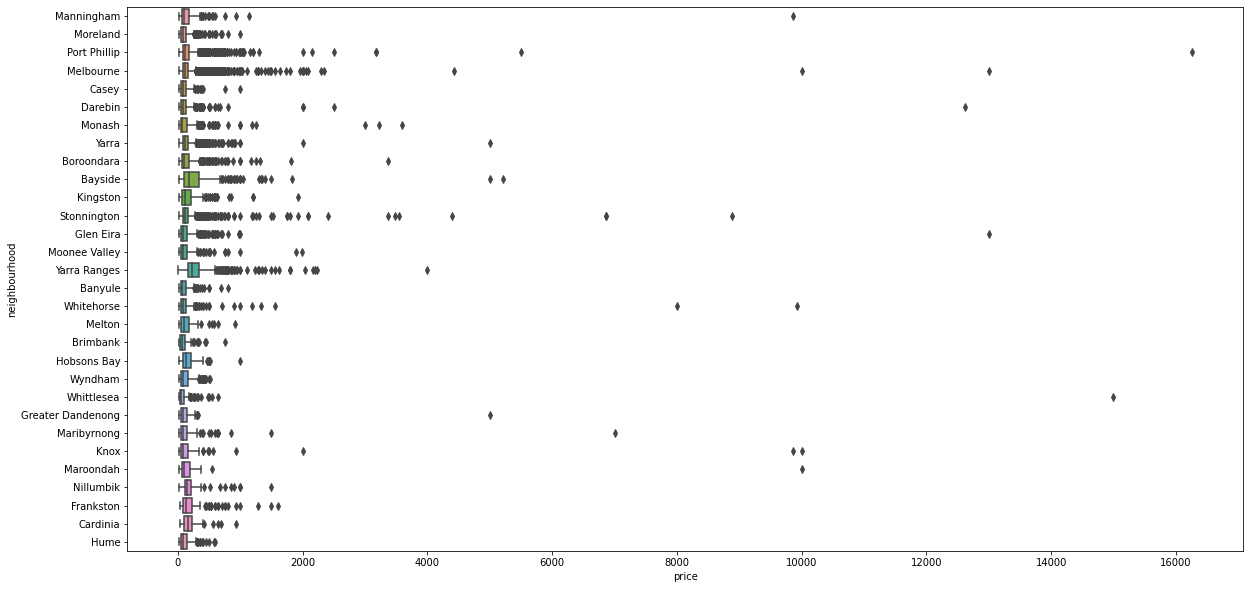

In [37]:
plt.figure(figsize=(20,10))
sns.boxplot(y='neighbourhood', x='price', data=new_data)
# sns.barplot(y=new_data.neighbourhood, x=new_data.price)

### 2. is there any relationship between the room_type and price?

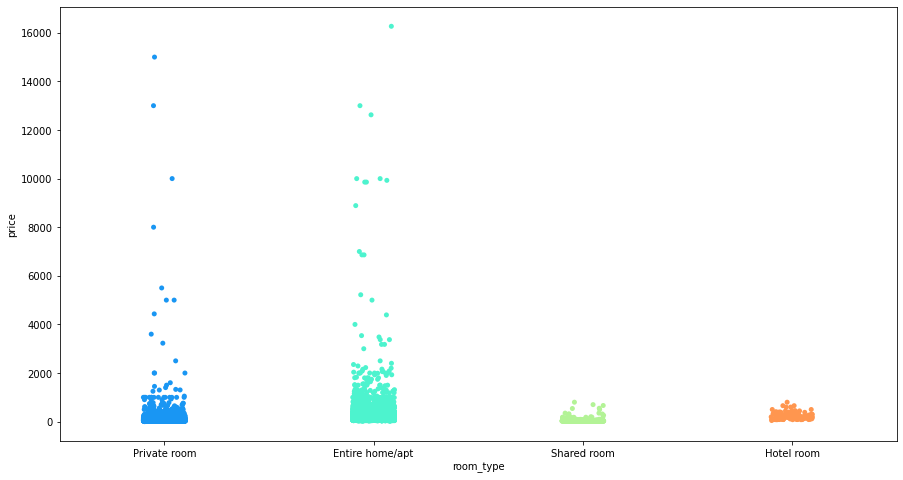

In [42]:
plt.figure(figsize=(15,8))
sns.stripplot(x='room_type',y='price',data=new_data, palette='rainbow')

In [85]:
# set(new_data.minimum_nights)

### 3. is there any relationship between the minimum_nights and price?

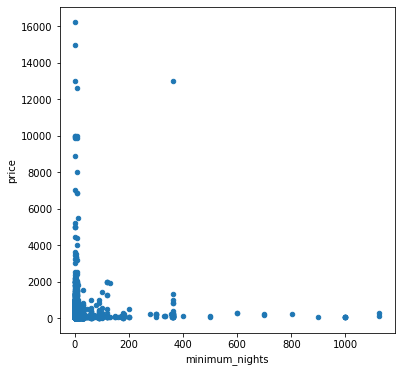

In [79]:
new_data.plot.scatter(x='minimum_nights', y='price', marker='o', figsize=(6,6))

some values mentioned the information that the minimum nights is over 100 days, these values might be the outliers or not, need to check with the data collecter.

### 4. will be price of the room changed in different years? (relationship between last_review and price)

In [91]:
# set(new_data.year_review)

In [93]:
new_data1 = new_data[new_data.year_review != 0]

In [95]:
set(new_data1.year_review)

{2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021}

In [99]:
# year
# sns.swarmplot(x='room_type', y='price', data=new_data1, hue='year_review', dodge=True, palette='viridis')

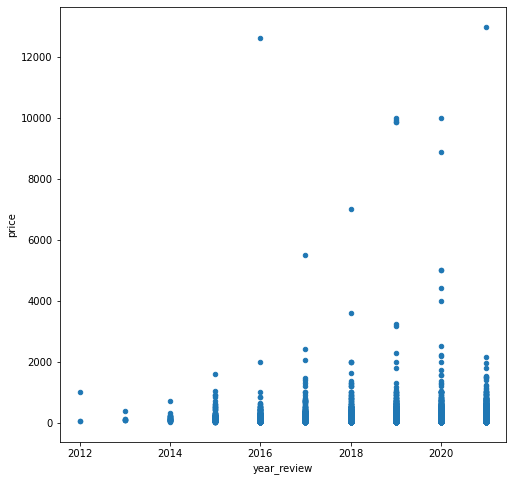

In [100]:
new_data1.plot.scatter(x='year_review', y='price', marker='o', figsize=(8,8))

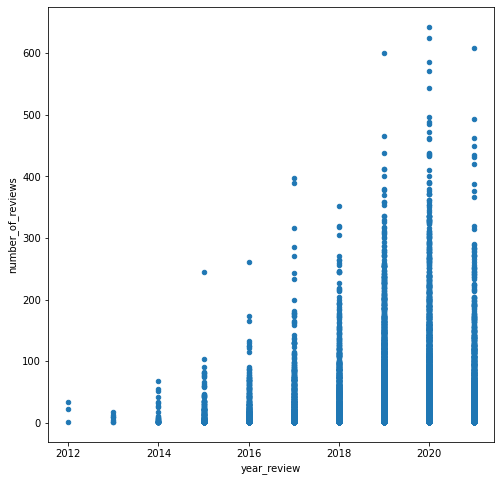

In [105]:
# year
new_data1.plot.scatter(x='year_review', y='number_of_reviews', marker='o', figsize=(8,8))

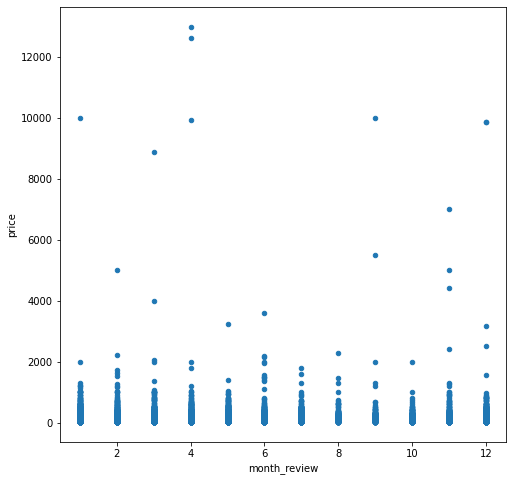

In [101]:
# month
new_data1.plot.scatter(x='month_review', y='price', marker='o', figsize=(8,8))

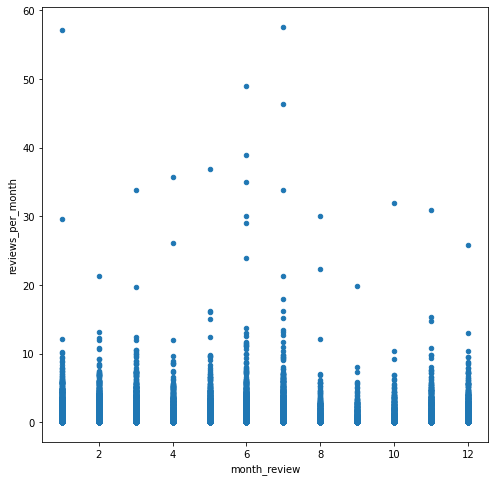

In [104]:
# # month
# new_data1.plot.scatter(x='month_review', y='number_of_reviews', marker='o', figsize=(8,8))
new_data1.plot.scatter(x='month_review', y='reviews_per_month', marker='o', figsize=(8,8))

### 5. will the availability affect the price?

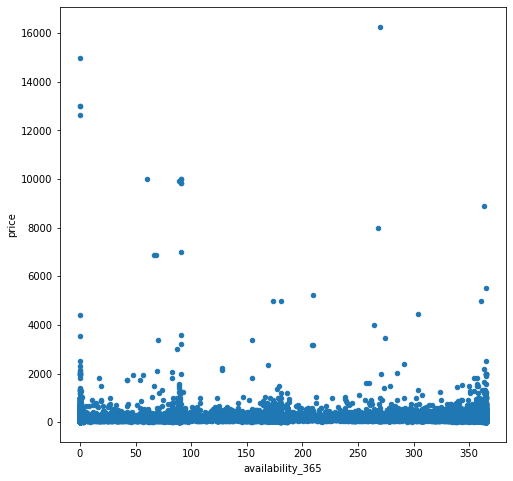

In [109]:
new_data.plot.scatter(x='availability_365', y='price', marker='o', figsize=(8,8))